# Time Series with Numpy

Author: Mike Wood

Learning objectives: By the end of this notebook, you should be able to:
1. Calculate trend lines in data
2. Visualize trends on a graph

**Import the libraries for this notebook**

In [2]:
# import the numpy and matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

## Importing data from a csv File

The numpy library provides us with a convenient way to read in data from a csv using the `genfromtxt` function:

In [3]:
# define the file name
file_name = 'SP500_Index.csv'

# read in the timeseries
timeseries = np.genfromtxt(file_name,delimiter=',',skip_header=1)

# print the first 5 rows of the timeseries
print(timeseries[:5, :])

[[2012.29508197 1385.14      ]
 [2012.29781421 1376.92      ]
 [2012.30054645 1378.53      ]
 [2012.30874317 1366.94      ]
 [2012.31147541 1371.97      ]]


### Make a plot of the data

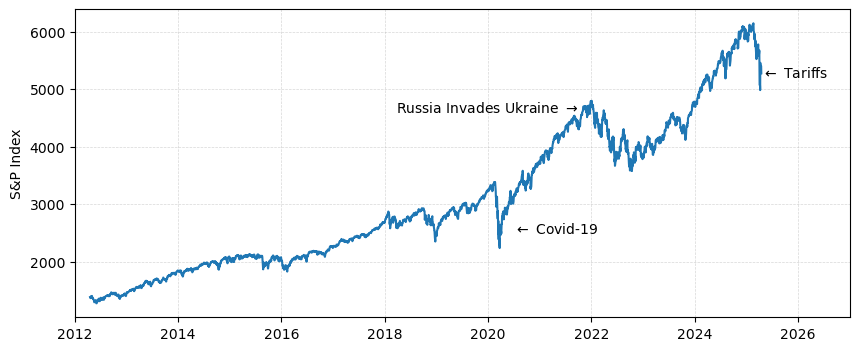

In [7]:
# make a new figure object
fig = plt.figure(figsize = (10,4))

# plot the timeseries
plt.plot(timeseries[:,0], timeseries[:,1])

# add labels to the data
plt.text(2020.5, 2500, '$\leftarrow$ Covid-19')
plt.text(2021.8, 4600, 'Russia Invades Ukraine $\\rightarrow$ ',ha='right')
plt.text(2025.3, 5200, '$\leftarrow$ Tariffs')

# add labels to the y axis
plt.ylabel('S&P Index')

# add gridlines
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

# change the x label bounds
plt.xlim([2012,2027])

# show the plot
plt.show()

### Computing trends
The numpy package provides the functionality to compute trends in data using the `polyfit` function.

In [8]:
# compute the coefficients of the trend line in the stock market index
coefficients = np.polyfit(timeseries[:,0], timeseries[:,1], 1)

# create the best fit function from the coefficients
f = np.poly1d(coefficients)

# compute the trend_line using the best fit function
trend_line = f(timeseries[:,0])

#### Plot the trend line on the graph

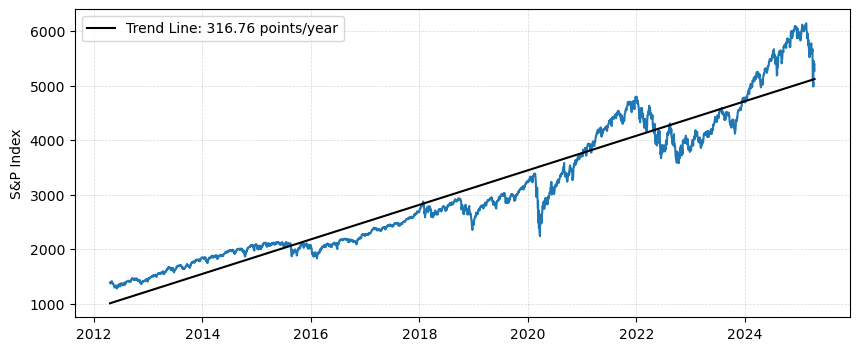

In [9]:
# make a new figure object
fig = plt.figure(figsize = (10,4))

# plot the timeseries
plt.plot(timeseries[:,0], timeseries[:,1])

# plot the trend line and label it
plt.plot(timeseries[:,0], trend_line, 'k-', label='Trend Line: '+'{:.2f}'.format(coefficients[-2])+' points/year')

# add labels to the y axis
plt.ylabel('S&P Index')

# add gridlines
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

# add a legend
plt.legend()

# show the plot
plt.show()

### Slicing data to specific timespans
Often, we may be interested in specific times within our data - for example timeseries of significant increases or decreases. In these cases, we can *slice* our data and compute trends on the slice:

In [10]:
# find the indices corresponding to the period July 2020 to Jan 2022
indices = np.logical_and(timeseries[:,0]>2020.5, timeseries[:,0]<2022)

# subset the timeseries to the indics
timeseries_subset = timeseries[indices, :]

# compute the trend line for the timeseries subset
coefficients_subset = np.polyfit(timeseries_subset[:,0], timeseries_subset[:,1], 1)
f_subset = np.poly1d(coefficients_subset)
trend_line_subset = f_subset(timeseries_subset[:,0])

Plot the trend line for the specified period

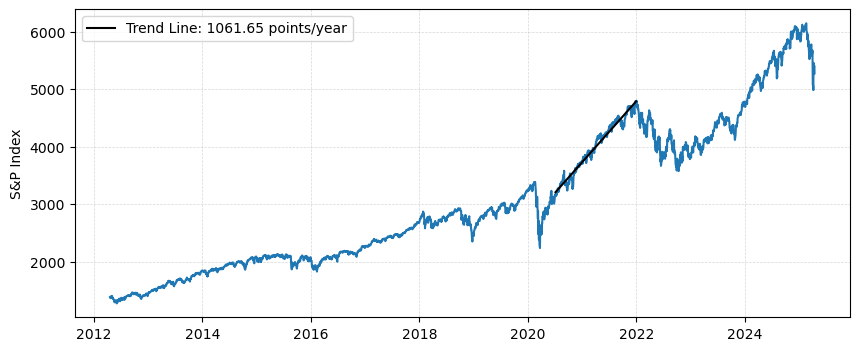

In [11]:
# make a new figure object
fig = plt.figure(figsize = (10,4))

# plot the timeseries
plt.plot(timeseries[:,0], timeseries[:,1])

# plot the trend line and label it
plt.plot(timeseries_subset[:,0], trend_line_subset, 'k-',
         label='Trend Line: '+'{:.2f}'.format(coefficients_subset[-2])+' points/year')

# add labels to the y axis
plt.ylabel('S&P Index')

# add gridlines
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

# add a legend
plt.legend()

# show the plot
plt.show()

### &#x1F914; Mini-Exercise
Goal: Find the post prosperous year in the past 10 years, and plot it in green. Next, find the year with the biggest decline, and color it red. Add their slopes to the legend

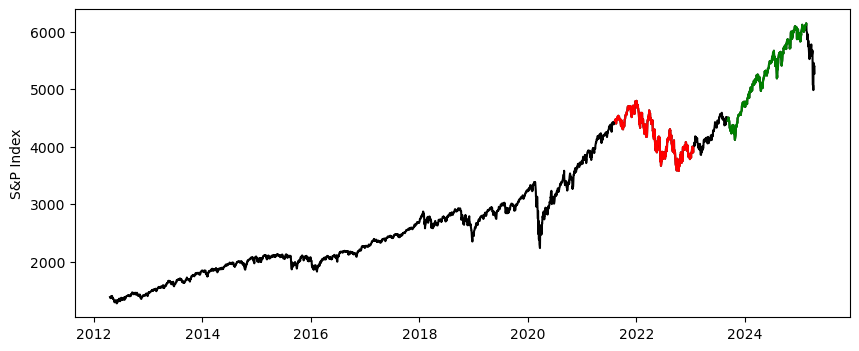

In [14]:
# run the calculations
index = 0
green_subset = timeseries[:365,:]
red_subset = timeseries[:365,:]
green_trend = -1e10
red_trend = 1e10

# loop through the timeseries and update the trends
# with the smallest and largest
for index in range(np.shape(timeseries)[0]-365):
    subset = timeseries[index:index+365]
    p = np.polyfit(subset[:,0], subset[:,1], 1)
    if p[0] > green_trend:
        green_trend = p[0]
        green_subset = subset
    if p[0] < red_trend:
        red_trend = p[0]
        red_subset = subset

# make a new figure object
fig = plt.figure(figsize = (10,4))

# plot the timeseries
plt.plot(timeseries[:,0], timeseries[:,1], 'k-')
plt.plot(green_subset[:,0], green_subset[:,1], 'g-',
         label='Trend: '+'{:.2f}'.format(green_trend)+' points/year')
plt.plot(red_subset[:,0], red_subset[:,1], 'r-',
         label='Trend: '+'{:.2f}'.format(red_trend)+' points/year')

# add labels to the y axis
plt.ylabel('S&P Index')

# show the plot
plt.show()